In [ ]:
# Notebook to get the light curve from TESS dataset

In [5]:
import matplotlib
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import warnings
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import os
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
%matplotlib inline

In [6]:
# Target star: XO-2N
# TIC 356473034
XO_2N_lcf = lk.search.search_lightcurvefile('TIC 356473034', sector=20).download()
XO_2N_tpf = lk.search.search_targetpixelfile('TIC 356473034', sector=20).download()

C:\Users\Mohamed Ismaiel\AppData\Local\Temp\ipykernel_15496\262028258.py:3: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  XO_2N_lcf = lk.search.search_lightcurvefile('TIC 356473034', sector=20).download()
C:\Users\Mohamed Ismaiel\anaconda3\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\Mohamed Ismaiel\anaconda3\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [7]:
# Contaminant star: XO-2S
# TIC 356473029
XO_2S_lcf = lk.search.search_lightcurvefile('TIC 356473029', sector=20).download()
# XO_2S_tpf = lk.search.search_targetpixelfile('TIC 356473029', sector=20).download()


C:\Users\Mohamed Ismaiel\AppData\Local\Temp\ipykernel_15496\722865059.py:3: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  XO_2S_lcf = lk.search.search_lightcurvefile('TIC 356473029', sector=20).download()
C:\Users\Mohamed Ismaiel\anaconda3\lib\site-packages\lightkurve\search.py:407: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<AxesSubplot:title={'center':'Target ID: 356473034, Cadence: 442835'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

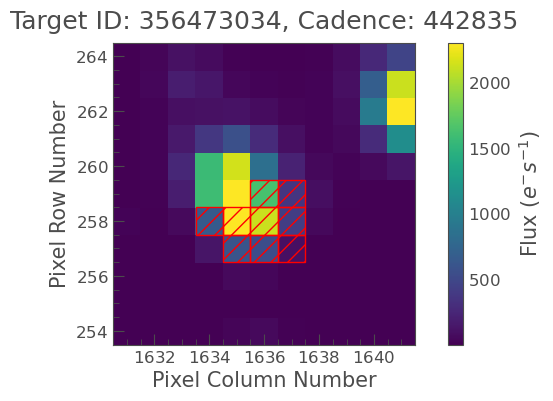

In [9]:
# Checking the mask for the target and contaminant star

XO_2N_tpf.plot(aperture_mask=XO_2N_tpf.pipeline_mask)
# XO_2S_tpf.plot(aperture_mask=XO_2S_tpf.pipeline_mask)

In [10]:
#Mask the source

custom_mask = XO_2N_tpf.pipeline_mask

custom_mask[5,2:4] = True
custom_mask[6,2:6] = True
custom_mask[7,2:6] = True
custom_mask[8,4] = True

# Plotting the end result
XO_2N_tpf.plot(aperture_mask=custom_mask)


<AxesSubplot:title={'center':'Target ID: 356473034, Cadence: 442835'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

In [11]:
# SAP photometry using the custom mask

XO_2N_customSAP = XO_2N_tpf.to_lightcurve(aperture_mask=custom_mask)

XO_2N_customSAP_quality = (XO_2N_customSAP.quality == 0)

XO_2N_customSAP_time = XO_2N_customSAP.time[XO_2N_customSAP_quality]
XO_2N_customSAP_flux = XO_2N_customSAP.flux[XO_2N_customSAP_quality]
XO_2N_customSAP_flux_err = XO_2N_customSAP.flux_err[XO_2N_customSAP_quality]


#A preliminary plot
XO_2N_customSAP.plot()
plt.ylim(16500,17000)



(16500.0, 17000.0)

In [12]:
# computing the sum of two SAPs
# Errors are the sum in quadrature of the individual errors
XO_2N_sumSAP_quality = (XO_2N_lcf.SAP_FLUX.quality == 0) & (XO_2S_lcf.SAP_FLUX.quality == 0)
XO_2N_sumSAP_flux = XO_2N_lcf.SAP_FLUX.flux[XO_2N_sumSAP_quality] + XO_2S_lcf.SAP_FLUX.flux[XO_2N_sumSAP_quality]
XO_2N_sumSAP_time = XO_2N_lcf.SAP_FLUX.time[XO_2N_sumSAP_quality]
XO_2N_sumSAP_flux_err = np.sqrt(XO_2N_lcf.SAP_FLUX.flux_err[XO_2N_sumSAP_quality]**2 + XO_2S_lcf.SAP_FLUX.flux_err[XO_2N_sumSAP_quality]**2)


# computing the sum of two PDCSAPs
XO_2N_sumPDC_quality = (XO_2N_lcf.PDCSAP_FLUX.quality == 0) & (XO_2S_lcf.PDCSAP_FLUX.quality == 0)
XO_2N_sumPDC_flux = XO_2N_lcf.PDCSAP_FLUX.flux[XO_2N_sumPDC_quality] + XO_2S_lcf.PDCSAP_FLUX.flux[XO_2N_sumPDC_quality]
XO_2N_sumPDC_time = XO_2N_lcf.PDCSAP_FLUX.time[XO_2N_sumPDC_quality]
XO_2N_sumPDC_flux_err = np.sqrt(XO_2N_lcf.PDCSAP_FLUX.flux_err[XO_2N_sumPDC_quality]**2 + XO_2S_lcf.PDCSAP_FLUX.flux_err[XO_2N_sumPDC_quality]**2)


C:\Users\Mohamed Ismaiel\AppData\Local\Temp\ipykernel_15496\2171398836.py:3: LightkurveDeprecationWarning: The SAP_FLUX function is deprecated and may be removed in a future version.
  XO_2N_sumSAP_quality = (XO_2N_lcf.SAP_FLUX.quality == 0) & (XO_2S_lcf.SAP_FLUX.quality == 0)
C:\Users\Mohamed Ismaiel\AppData\Local\Temp\ipykernel_15496\2171398836.py:4: LightkurveDeprecationWarning: The SAP_FLUX function is deprecated and may be removed in a future version.
  XO_2N_sumSAP_flux = XO_2N_lcf.SAP_FLUX.flux[XO_2N_sumSAP_quality] + XO_2S_lcf.SAP_FLUX.flux[XO_2N_sumSAP_quality]
C:\Users\Mohamed Ismaiel\AppData\Local\Temp\ipykernel_15496\2171398836.py:5: LightkurveDeprecationWarning: The SAP_FLUX function is deprecated and may be removed in a future version.
  XO_2N_sumSAP_time = XO_2N_lcf.SAP_FLUX.time[XO_2N_sumSAP_quality]
C:\Users\Mohamed Ismaiel\AppData\Local\Temp\ipykernel_15496\2171398836.py:6: LightkurveDeprecationWarning: The SAP_FLUX function is deprecated and may be removed in a futur

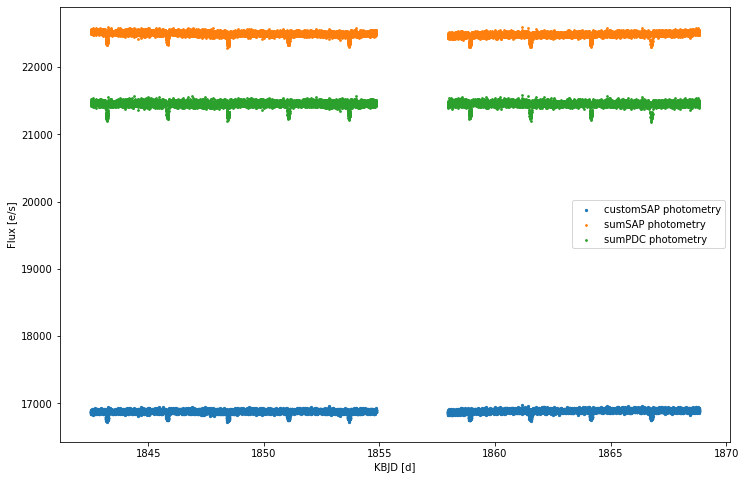

In [14]:
# Comparing the results
# We can see that there is some offset between the different photometry
# possibily caused by the different choice of the masks


plt.figure(figsize=(12,8))
plt.scatter(XO_2N_customSAP_time.btjd, XO_2N_customSAP_flux, s=5, label='customSAP photometry')
plt.scatter(XO_2N_sumSAP_time.btjd, XO_2N_sumSAP_flux, s=3, label='sumSAP photometry')
plt.scatter(XO_2N_sumPDC_time.btjd, XO_2N_sumPDC_flux, s=3, label='sumPDC photometry')

plt.legend()
plt.xlabel('KBJD [d]')
plt.ylabel('Flux [e/s]')

plt.show()


In [17]:
# we can divide each lightcurve for its median. 
# If we zoom in on a transit, we can already see some difference between the SAPs and sumPDCSAP

from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

plt.figure(figsize=(12,8))

period = 2.61585922
time_of_transit = 2455565.546480

phase_lims = [0.10, 0.30]

XO_2N_customSAP_phase = (((XO_2N_customSAP_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 
p1 = plt.scatter(XO_2N_customSAP_phase, XO_2N_customSAP_flux/np.median(XO_2N_customSAP_flux), s=15, label='customSAP photometry')

XO_2N_sumSAP_phase = (((XO_2N_sumSAP_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 
p2 = plt.scatter(XO_2N_sumSAP_phase, XO_2N_sumSAP_flux/np.median(XO_2N_sumSAP_flux), s=3, label='sumSAP photometry')

XO_2N_sumPDC_phase = (((XO_2N_sumPDC_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period
p3 = plt.scatter(XO_2N_sumPDC_phase, XO_2N_sumPDC_flux/np.median(XO_2N_sumPDC_flux), s=3, label='sumPDC photometry')

FFI_data = np.genfromtxt('Data_Files/XO-2N_FFI.dat')
FFI_phase =  (((FFI_data[:,0] + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 

FFI_sel_normalization = ((np.abs(FFI_phase) > phase_lims[0]) & ((np.abs(FFI_phase) < phase_lims[1]))) 
FFI_norm_factor = np.median(FFI_data[FFI_sel_normalization,1])
p4 = plt.scatter(FFI_phase, FFI_data[:,1]/FFI_norm_factor, c='black', s=50, label='FFI')

plt.ylim(0.985 , 1.006)
plt.xlim(-0.06, 0.06)
plt.legend()
plt.xlabel('Phase [Days]')
plt.ylabel('Normalized Flux')
plt.legend([(p1),(p2),(p3),(p4),(p3, p2, p1, p4)], ['customSAP photometry','sumSAP photometry','sumPDC photometry','FFI',r'$\pm  0.000959$'], numpoints=1,handler_map={tuple: HandlerTuple(ndivide=None)})
plt.show()


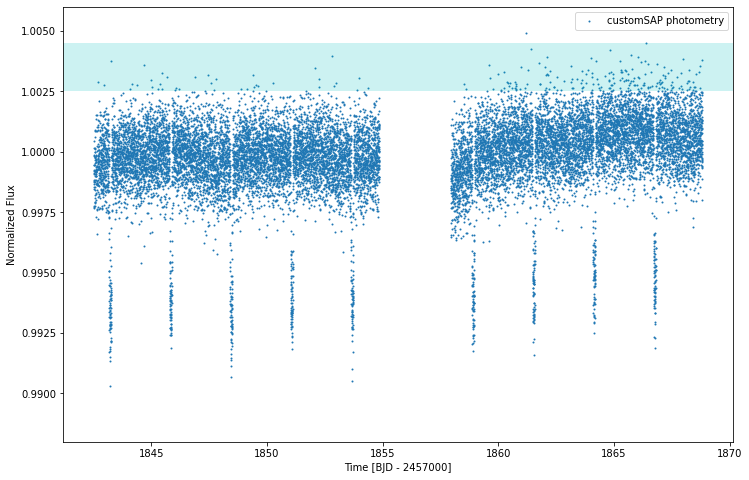

In [19]:
# Here, No prior knowledge on period or time of transit

plt.figure(figsize=(12,8))
phase_lims = [0.10, 0.30]
XO_2N_customSAP_phase = XO_2N_customSAP_time.btjd
plt.scatter(XO_2N_customSAP_phase, XO_2N_customSAP_flux/np.median(XO_2N_customSAP_flux), s=1, label='customSAP photometry')
plt.ylim(0.988 , 1.006)
plt.legend()
plt.xlabel('Time [BJD - 2457000]')
plt.ylabel('Normalized Flux')
a, b = 1.0025, 1.0045
plt.axhspan(a, b, color='c', alpha=0.2, lw=0)
plt.show()


In [23]:
# Each lighcurve is affected by different systematics - depending on the pixels that have been included in the mask, 
# the correction for instrument systematics in the PDCSAP, etc... 
# The proper way to compare the different lightcurve is to remove the instrumental and astrophysical systematics 
# and keep the transits only in ALL of them, i.e. the so called flattening 
# We use the program Wotan 

from wotan import flatten

XO_2N_customSAP_flatten_lc, XO_2N_customSAP_trend_lc = flatten(
    XO_2N_customSAP_time.btjd,                 # Array of time values
    XO_2N_customSAP_flux,                 # Array of flux values
    method='biweight',
    window_length=1.00,    # The length of the filter window in units of ``time``
    edge_cutoff=0.0,      # length (in units of time) to be cut off each edge.
    break_tolerance=0.0,  # Split into segments at breaks longer than that
    return_trend=True,    # Return trend and flattened light curve
    cval=5.0              # Tuning parameter for the robust estimators
    )


XO_2N_sumSAP_flatten_lc, XO_2N_customSAP_trend_lc = flatten(
    XO_2N_sumSAP_time.btjd,                 
    XO_2N_sumSAP_flux,                
    method='biweight',
    window_length=1.00,   
    edge_cutoff=0.0,      
    break_tolerance=0.0,  
    return_trend=True,   
    cval=5.0              
    )

XO_2N_sumPDC_flatten_lc, XO_2N_customPDC_trend_lc = flatten(
    XO_2N_sumPDC_time.btjd,              
    XO_2N_sumPDC_flux,               
    method='biweight',
    window_length=1.00,    
    edge_cutoff=0.0,      
    break_tolerance=0.0,  
    return_trend=True,    
    cval=5.0              
    )

plt.figure(figsize=(12,8))
q1 = plt.scatter(XO_2N_customSAP_time.btjd, XO_2N_customSAP_flatten_lc, s=15, alpha=0.2, label='customSAP')
q2 = plt.scatter(XO_2N_sumSAP_time.btjd, XO_2N_sumSAP_flatten_lc, s=15, alpha=0.2)
q3 = plt.scatter(XO_2N_sumPDC_time.btjd, XO_2N_sumPDC_flatten_lc, s=15, alpha=0.2)



plt.xlabel('Time [BJD - 2457000]')
plt.ylabel('Normalized Flux')
plt.legend([(q1),(q2),(q3),(q3, q2, q1)], ['customSAP','sumSAP','sumPDC',r'$\pm  0.000959$'], loc=8, numpoints=1,handler_map={tuple: HandlerTuple(ndivide=None)})
#plt.legend()
plt.show()


### We can do the same usnig another method i.e. Huber (see files)
#Next Notebook

In [ ]:
# to average flux on a single pixel, 
# so we compute the SAP on all the background pixels in the mask 
# and then divide the output for the number of pixels in the background mask then 
# multiply it for the total number of pixels.

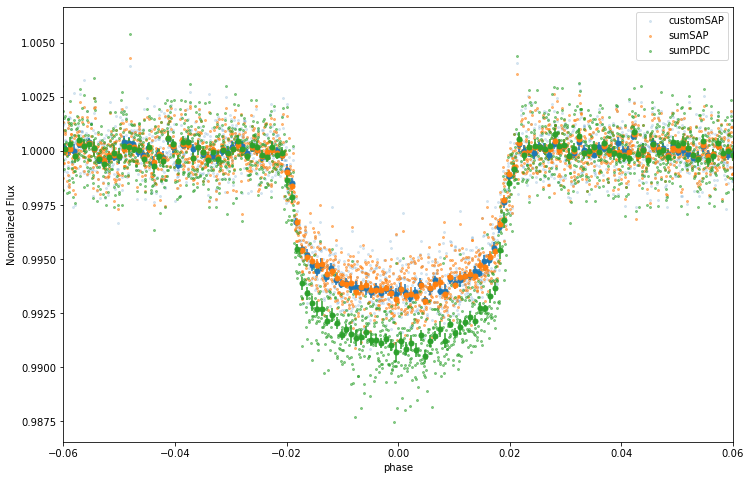

In [24]:
# We fold the lightcurve around the planetary period
# We also perform a binning of the lightcurve, with the only goal of COMPARE the different lightcurve

period = 2.61585922
time_of_transit = 2455565.546480


plt.figure(figsize=(12,8))

XO_2N_customSAP_phase =  (((XO_2N_customSAP_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 
XO_2N_sumSAP_phase =  (((XO_2N_sumSAP_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 
XO_2N_sumPDC_phase =  (((XO_2N_sumPDC_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 



plt.scatter(XO_2N_customSAP_phase, XO_2N_customSAP_flatten_lc, c='C0', s=4, label='customSAP', alpha=0.15)

## binning the LC for easier visualization

XO_2N_customSAP_phase_index = np.argsort(XO_2N_customSAP_phase)
curve_length = len(XO_2N_customSAP_phase_index)
n_bins = 15 # binnning every 30 minutes
n_reshape = (curve_length//n_bins)*n_bins

XO_2N_customSAP_phase_binned = np.mean(XO_2N_customSAP_phase[XO_2N_customSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_customSAP_flux_binned = np.mean(XO_2N_customSAP_flatten_lc[XO_2N_customSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_customSAP_ferr_binned = np.std(XO_2N_customSAP_flatten_lc[XO_2N_customSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)/np.sqrt(n_bins)
plt.errorbar(XO_2N_customSAP_phase_binned, 
             XO_2N_customSAP_flux_binned, 
             yerr = XO_2N_customSAP_ferr_binned, ms=5, fmt='o', c='C0')



plt.scatter(XO_2N_sumSAP_phase, XO_2N_sumSAP_flatten_lc, c='C1', s=4, label='sumSAP', alpha=0.5)

# binning for sumSAP
XO_2N_sumSAP_phase_index = np.argsort(XO_2N_sumSAP_phase)
curve_length = len(XO_2N_sumSAP_phase_index)
n_bins = 15 # binnning every 30 minutes
n_reshape = (curve_length//n_bins)*n_bins

XO_2N_sumSAP_phase_binned = np.mean(XO_2N_sumSAP_phase[XO_2N_sumSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_sumSAP_flux_binned = np.mean(XO_2N_sumSAP_flatten_lc[XO_2N_sumSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_sumSAP_ferr_binned = np.std(XO_2N_sumSAP_flatten_lc[XO_2N_sumSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)/np.sqrt(n_bins)
plt.errorbar(XO_2N_sumSAP_phase_binned, 
             XO_2N_sumSAP_flux_binned, 
             yerr = XO_2N_sumSAP_ferr_binned, ms=5, fmt='o', c='C1')






plt.scatter(XO_2N_sumPDC_phase, XO_2N_sumPDC_flatten_lc, c='C2', s=4, label='sumPDC', alpha=0.5)

# binning for sumPDC
XO_2N_sumPDC_phase_index = np.argsort(XO_2N_sumPDC_phase)
curve_length = len(XO_2N_sumPDC_phase_index)
n_bins = 15 # binnning every 30 minutes
n_reshape = (curve_length//n_bins)*n_bins

XO_2N_sumPDC_phase_binned = np.mean(XO_2N_sumSAP_phase[XO_2N_sumPDC_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_sumPDC_flux_binned = np.mean(XO_2N_sumPDC_flatten_lc[XO_2N_sumPDC_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_sumPDC_ferr_binned = np.std(XO_2N_sumPDC_flatten_lc[XO_2N_sumPDC_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)/np.sqrt(n_bins)
plt.errorbar(XO_2N_sumPDC_phase_binned, 
             XO_2N_sumPDC_flux_binned, 
             yerr = XO_2N_sumPDC_ferr_binned, ms=5, fmt='o', c='C2')

plt.xlabel('phase')
plt.ylabel('Normalized Flux')
plt.xlim(-0.06, 0.06)
plt.legend()
plt.show()

### Discussion and conclusion

We can see that the *custom mask* and the sum of two *SAPs* (as extracted by the NASA TESS team) are nearly identical. 
The results are not exactly the same because the mask of XO-2S and the mask of XO-2N have two overlapping pixels
at (column:5, row:5) and (column:4, row:5) in XO-2N mask, (column:6, row:3) and (column:4, row:3) in XO-2S mask respectively (check the plots at the beginning of the jupyter notebook). So when we sum the two TESS SAP photometries, we are counting those pixels twice.
The overlapping pixels do not seem to influence the results, possible explanations are:
- the total flux in each pixel is very small (but it doesn't seem the case)
- the ratio of flux from XO-2N over the flux from XO-2S is equal to the average value, so in the end counting those pixels is not changing the results. 
This result may just be a lucky coincidence: may suggestion is to use the custom mask because in this way you have control of the pixels you are taking into account for the photometry. 

The transit depth resulting from the sum of two PDCSAP lighcurve is instead totally different from the one obtained by custom SAP - This is telling us that the correction for instrumental systematics using Principal Component Analysis is introducing a variation of the flux (that we know being multiplicative, from the comparison of SAP and PDCSAP of a single targe, after normalization) that is different from target to target, even if they are just a few pixels away from each other. 

The conclusive remark of this analysis is: use the PDCSAP only if you don't have contamination, use the custom mask if you want to take into account contamination. 


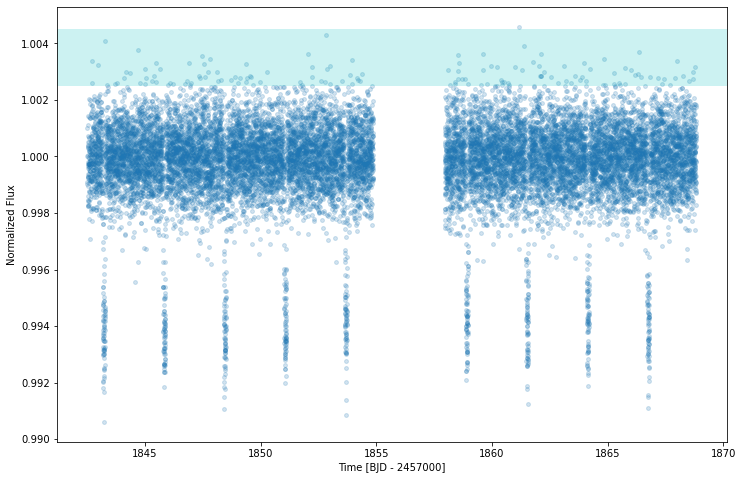

In [27]:
# Back to the outliers
XO_2N_customSAP_flatten_lc, XO_2N_customSAP_trend_lc = flatten(
    XO_2N_customSAP_time.btjd,                
    XO_2N_customSAP_flux,                
    method='biweight',
    window_length=1.00,    
    edge_cutoff=0.0,      
    break_tolerance=0.0,  
    return_trend=True,   
    cval=5.0              
    )
    
plt.figure(figsize=(12,8))
plt.scatter(XO_2N_customSAP_time.btjd, XO_2N_customSAP_flatten_lc, s=15, alpha=0.2)
plt.xlabel('Time [BJD - 2457000]')
plt.ylabel('Normalized Flux')
a, b = 1.0025, 1.0045
plt.axhspan(a, b, color='c', alpha=0.2, lw=0)
plt.show()

In [29]:
# We fold the lightcurve around the planetary period
# We also perform a binning of the lightcurve, with the only goal of COMPARE the different lightcurve

period = 2.61585922
time_of_transit = 2455565.546480


plt.figure(figsize=(12,8))

XO_2N_customSAP_phase =  (((XO_2N_customSAP_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 
XO_2N_sumSAP_phase =  (((XO_2N_sumSAP_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 
XO_2N_sumPDC_phase =  (((XO_2N_sumPDC_time.btjd + 2457000.0) - time_of_transit + period/2. )%period - period/2) / period 



plt.scatter(XO_2N_customSAP_phase, XO_2N_customSAP_flatten_lc, c='BLACK', s=4, label='TESS customSAP', alpha=0.15)
XO_2N_customSAP_phase_index = np.argsort(XO_2N_customSAP_phase)
curve_length = len(XO_2N_customSAP_phase_index)
n_bins = 15 # binnning every 30 minutes
n_reshape = (curve_length//n_bins)*n_bins

XO_2N_customSAP_phase_binned = np.mean(XO_2N_customSAP_phase[XO_2N_customSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_customSAP_flux_binned = np.mean(XO_2N_customSAP_flatten_lc[XO_2N_customSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)
XO_2N_customSAP_ferr_binned = np.std(XO_2N_customSAP_flatten_lc[XO_2N_customSAP_phase_index[:n_reshape]].reshape(-1, n_bins), axis=1)/np.sqrt(n_bins)
plt.errorbar(XO_2N_customSAP_phase_binned, 
             XO_2N_customSAP_flux_binned, 
             yerr = XO_2N_customSAP_ferr_binned, ms=5, fmt='o', c='red', label='mean')

plt.xlabel('phase [Days]')
plt.ylabel('Normalized Flux')
plt.xlim(-0.06, 0.06)
plt.legend()
plt.show()



In [30]:
fileout = open('Data_Files/XO2_flattened_biweight.dat', 'w') 

for t, f, e in zip(XO_2N_customSAP_time.btjd, XO_2N_customSAP_flatten_lc, XO_2N_customSAP_flux_err/XO_2N_customSAP_trend_lc):
    if np.isnan(f): continue               
    fileout.write('{0:17.7f} {1:14f} {2:14f}\n'.format(t, f, e))  
               
fileout.close()             
               